# 1. Import the required libraries and load the data:

In [1]:
#Load the required libraries and read the dataset
import numpy as np
import pandas as pd   
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
import scipy.stats as stats
from scipy import stats
from sklearn.cluster import KMeans
from scipy.stats import zscore
from scipy.spatial import distance
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
#1.Loading the dataset using pandas
df=pd.read_csv('renttherunway-1.csv')

In [3]:
#2.Check the first few samples, shape, info of the data and try to familiarize yourself with different features
#Let's check if the dataset is uploaded
df.head()

,Unnamed: 0,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"
1,1,fit,273551,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013"
2,2,fit,360448,NaN,1063761,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,"December 14, 2015"
3,3,fit,909926,34c,126335,135lbs,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014"
4,4,fit,151944,34b,616682,145lbs,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016"


In [4]:
df.shape
#There are 192544 records and 16 columns in the dataset

(192544, 16)

In [5]:
df.size

3080704

In [6]:
df.info()
#Most of the columns are of object datatype(10), 4 columns have int data type and 2 columns are of float datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192544 entries, 0 to 192543
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      192544 non-null  int64  
 1   fit             192544 non-null  object 
 2   user_id         192544 non-null  int64  
 3   bust size       174133 non-null  object 
 4   item_id         192544 non-null  int64  
 5   weight          162562 non-null  object 
 6   rating          192462 non-null  float64
 7   rented for      192534 non-null  object 
 8   review_text     192482 non-null  object 
 9   body type       177907 non-null  object 
 10  review_summary  192199 non-null  object 
 11  category        192544 non-null  object 
 12  height          191867 non-null  object 
 13  size            192544 non-null  int64  
 14  age             191584 non-null  float64
 15  review_date     192544 non-null  object 
dtypes: float64(2), int64(4), object(10)
memory usage: 23.5+ 

# 2. Data cleansing and Exploratory data analysis: [ Score: 20 point ]

In [7]:
#3.Check if there are any duplicate records in the dataset? If any drop them.
df.duplicated()

#There are no duplicate records in the dataset

0         False
1         False
2         False
3         False
4         False
          ...  
192539    False
192540    False
192541    False
192542    False
192543    False
Length: 192544, dtype: bool

In [8]:
#4.Drop the columns which you think redundant for the analysis.(Hint: drop columns like ‘id’, ‘review’)
df.drop(['user_id','item_id','review_text','review_summary','review_date'],axis=1,inplace=True)
df.head()

,Unnamed: 0,fit,bust size,weight,rating,rented for,body type,category,height,size,age
0,0,fit,34d,137lbs,10.0,vacation,hourglass,romper,"5' 8""",14,28.0
1,1,fit,34b,132lbs,10.0,other,straight & narrow,gown,"5' 6""",12,36.0
2,2,fit,NaN,NaN,10.0,party,NaN,sheath,"5' 4""",4,116.0
3,3,fit,34c,135lbs,8.0,formal affair,pear,dress,"5' 5""",8,34.0
4,4,fit,34b,145lbs,10.0,wedding,athletic,gown,"5' 9""",12,27.0


In [9]:
#5.Check the column 'weight', Is there any presence of string data? If yes, remove the string data and convert to float. 
#(Hint: 'weight' has the suffix as lbs)
df['weight']=df['weight'].str.replace('lbs','').astype(float)
df.head()

,Unnamed: 0,fit,bust size,weight,rating,rented for,body type,category,height,size,age
0,0,fit,34d,137.0,10.0,vacation,hourglass,romper,"5' 8""",14,28.0
1,1,fit,34b,132.0,10.0,other,straight & narrow,gown,"5' 6""",12,36.0
2,2,fit,NaN,NaN,10.0,party,NaN,sheath,"5' 4""",4,116.0
3,3,fit,34c,135.0,8.0,formal affair,pear,dress,"5' 5""",8,34.0
4,4,fit,34b,145.0,10.0,wedding,athletic,gown,"5' 9""",12,27.0


In [10]:
#6.Check the unique categories for the column 'rented for' and group 'party: cocktail' category with 'party'
df['rented for'].unique()

#There are 10 unique categories in the 'rented for' column

array(['vacation', 'other', 'party', 'formal affair', 'wedding', 'date',
       'everyday', 'work', nan, 'party: cocktail'], dtype=object)

In [11]:
#Grouping the columns party: cocktail' category with 'party'

df['rented for']=df['rented for'].replace({'party: cocktail':'party'})
df['rented for'].value_counts()

wedding          57784
formal affair    40408
party            35627
everyday         16822
other            15388
work             15042
date              7388
vacation          4075
Name: rented for, dtype: int64

In [12]:
#7.The column 'height' is in feet with a quotation mark,Convert to inches with float datatype.
df['height']=df['height'].str.replace('"','')
df['height']=df['height'].str.replace("'",'')
df['height']=df['height'].str[:1].astype(float)*12 + df['height'].str[1:].astype(float)

df['height']

0         68.0
1         66.0
2         64.0
3         65.0
4         69.0
          ... 
192539    69.0
192540    61.0
192541    68.0
192542    66.0
192543    66.0
Name: height, Length: 192544, dtype: float64

In [13]:
#8.Check for missing values in each column of the dataset? If it exists, impute them with appropriate methods.
df.isnull()

# There are missing values in these columns - bust size,weight,body type,age

,Unnamed: 0,fit,bust size,weight,rating,rented for,body type,category,height,size,age
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,True,True,False,False,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
192539,False,False,False,False,False,False,False,False,False,False,False
192540,False,False,False,False,False,False,False,False,False,False,False
192541,False,False,False,False,False,False,False,False,False,False,False
192542,False,False,False,False,False,False,False,False,False,False,False


In [14]:
#Dropping missing values ftom the columns ('bust size','body type')
df=df.dropna( how='any',subset=['bust size','body type'])
#Replacing the missing values with mean
df['weight']=df['weight'].fillna(df['weight'].mean())
df['age']=df['age'].fillna(df['age'].mean())

df.head()



,Unnamed: 0,fit,bust size,weight,rating,rented for,body type,category,height,size,age
0,0,fit,34d,137.0,10.0,vacation,hourglass,romper,68.0,14,28.0
1,1,fit,34b,132.0,10.0,other,straight & narrow,gown,66.0,12,36.0
3,3,fit,34c,135.0,8.0,formal affair,pear,dress,65.0,8,34.0
4,4,fit,34b,145.0,10.0,wedding,athletic,gown,69.0,12,27.0
5,5,fit,32b,138.0,8.0,date,athletic,dress,68.0,8,45.0


In [15]:
#9Check the statistical summary for the numerical and categorical columns and write your findings.
df.describe()

##The above function gives the insights for all numerical records present in the dataframe,
#eg- Rating 
#count-There are 165507 records in total
#mean-Average rating is 9
#min-The minimum Monthly charges is 2
#max-The maximum Monthly charges is 10
#Standard deviation-1
#25%,50%,75% represents the 1st,2nd and 3rd quartile respectively

df.describe(include='object')
#In the categorical summary ,
#eg- bust size-
#there are 108 unique categories in bust size
#top category in bust size is 34b
#frequency of bust size is 25949

,fit,bust size,rented for,body type,category
count,165575,165575,165568,165575,165575
unique,3,104,8,7,68
top,fit,34b,wedding,hourglass,dress
freq,121977,25949,48794,51495,79847


<AxesSubplot:xlabel='age'>

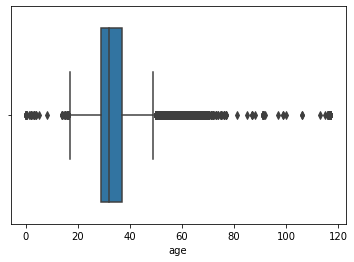

In [16]:
#10.Are there outliers present in the column age? If yes treat them with appropriate method
sns.boxplot(df['age'])

#This boxplot shows the presence of outliers above 50 years of age

In [17]:
#Removing outliers by using drop
df.drop(df[df['age']>50].index,inplace=True)


<AxesSubplot:xlabel='rented for', ylabel='count'>

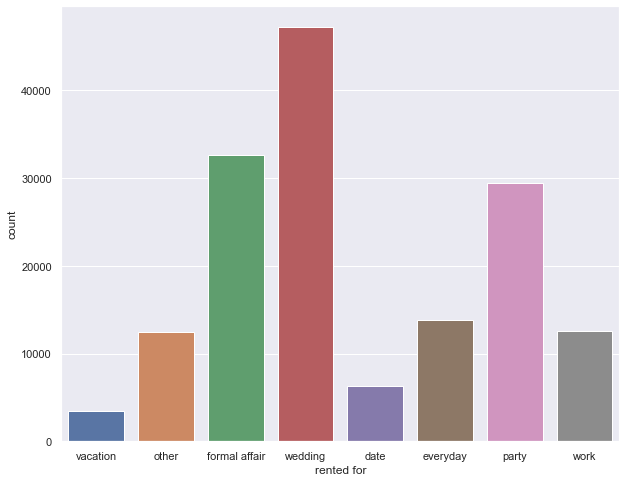

In [18]:
#11.Check the distribution of the different categories in the column 'rented for' using appropriate plot.
sns.set(rc={"figure.figsize":(10, 8)})
sns.countplot( x ='rented for',data=df)

#The countplot shows number of people who have rented clothing for each of the categories(8 categories)
#Maximum number of people have rented for wedding,few people have rented for vacation

# 3. Data Preparation for model building:

In [22]:
#12.Encode the categorical variables in the dataset.
df_categorical=df[['fit','bust size','rented for','body type','category','height']]

#Coverting all categorical variables into numerical type
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for x in df_categorical:
    df[x] = le.fit_transform(df[x].astype(str))
    


In [27]:
#13.Standardize the data, so that the values are within a particular range using standard scaler
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()
df.iloc[:,:] = ss.fit_transform(df.iloc[:,:])


# 4. Principal Component Analysis and Clustering:

In [28]:
#14. Apply PCA on the above dataset and determine the number of PCA components to be used so that 90-95% of the variance in data
#is explained by the same.

df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna()
df = df.reset_index()
pca_df=df.copy()


X = pca_df.drop('rented for',axis=1)
y = pca_df['rented for']

### split the datatset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

## scale the independent features using standard scalar

X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)


ValueError: cannot insert level_0, already exists

In [29]:
# Calculating covarinace matrix along with eigen values and eigen vectors

cov_matrix = np.cov(X_train.T)
print('Covariance matrix','\n',cov_matrix)
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen vectors:','\n',eig_vecs)
print('\n')
print('Eigen values:','\n',eig_vals)

Covariance matrix 
 [[ 1.00000905e+00  1.00000822e+00  1.00000822e+00 -2.03281370e-03
   1.64249192e-03  3.02274183e-03 -7.72588735e-03 -2.84483903e-03
  -2.46214879e-03  1.29185310e-03  3.49715748e-03 -6.73539970e-03]
 [ 1.00000822e+00  1.00000905e+00  1.00000905e+00 -2.03262421e-03
   1.64646956e-03  3.01991879e-03 -7.72701158e-03 -2.84167819e-03
  -2.46404732e-03  1.29162521e-03  3.49878362e-03 -6.73511553e-03]
 [ 1.00000822e+00  1.00000905e+00  1.00000905e+00 -2.03262421e-03
   1.64646956e-03  3.01991879e-03 -7.72701158e-03 -2.84167819e-03
  -2.46404732e-03  1.29162521e-03  3.49878362e-03 -6.73511553e-03]
 [-2.03281370e-03 -2.03262421e-03 -2.03262421e-03  1.00000905e+00
   5.44331718e-03  1.22437050e-02 -2.45459546e-01 -9.34728346e-03
   1.02420385e-02 -2.57359449e-03  6.45546688e-02 -4.49298053e-04]
 [ 1.64249192e-03  1.64646956e-03  1.64646956e-03  5.44331718e-03
   1.00000905e+00  4.90874254e-01 -2.57919521e-02 -1.55674892e-01
  -1.58316150e-02  8.14784396e-02  5.70270448e-01  1

In [30]:
#Calculating the variance and cumulative variance
total = sum(eig_vals)
var_exp = [ (i/total)*100  for i in sorted(eig_vals,reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print('Variance Explained: ',var_exp)
print('Cummulative Variance Explained: ',cum_var_exp)

Variance Explained:  [25.002546076251626, 20.25015747871879, 10.445094539141161, 8.71789331868852, 8.212938782533486, 7.621309841409218, 7.38028647521584, 6.2459174460318705, 4.221866420899363, 1.9019804059591285, 9.21515099130546e-06, -8.453601700943697e-16]
Cummulative Variance Explained:  [ 25.00254608  45.25270355  55.69779809  64.41569141  72.6286302
  80.24994004  87.63022651  93.87614396  98.09801038  99.99999078
 100.         100.        ]


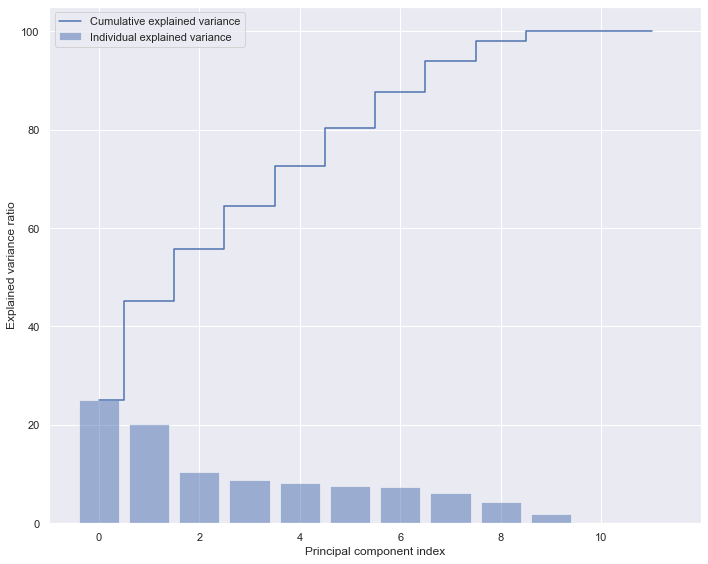

In [31]:
#Plotting bar graph Individual explained variance against Cumulative explained variance.
import matplotlib.pyplot as plt
cum_sum_exp = np.cumsum(var_exp)
plt.bar(range(0,len(var_exp)), var_exp, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_exp)), cum_sum_exp, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [32]:
#First 7 principal components explain 99% of the variance in the data. 
# so, we can choose the optimal number of principal components as 7.
from sklearn.decomposition import PCA
pca=PCA(n_components = 7)
pca.fit(pca_df)

PCA(n_components=7)

In [33]:
pca_df = pca.transform(pca_df)
pca_df = pd.DataFrame(pca_df,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7'])
pca_df.head()


,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-78896.500038,-0.239012,-0.610638,0.575596,1.857392,1.294318,0.117915
1,-78895.500038,-0.791527,-1.054111,-1.219905,-1.309640,1.374542,-1.480947
2,-78894.500038,-1.131440,0.114254,-0.370812,-1.401214,0.070151,0.055103
3,-78893.500038,0.232844,-1.080725,-0.690969,1.728545,-0.579197,0.174330
4,-78892.500038,0.419989,0.128653,0.436361,-0.740869,0.309837,-0.669467


In [34]:
#15.Apply K-means clustering and segment the data. (You may use original data or PCA transformed data) 
#a. Find the optimal K Value using elbow plot for Kmeans clustering.
df_scaled=df.sample(20000)
cluster_range = range(2,15)
cluster_errors = []

for num_clusters in cluster_range:
   
    clusters = KMeans(num_clusters, n_init=10)
    clusters.fit(df_scaled)
    
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    
    cluster_errors.append(clusters.inertia_)

clusters_df = pd.DataFrame({'num_clusters':cluster_range, 
                           'cluster_errors':cluster_errors})



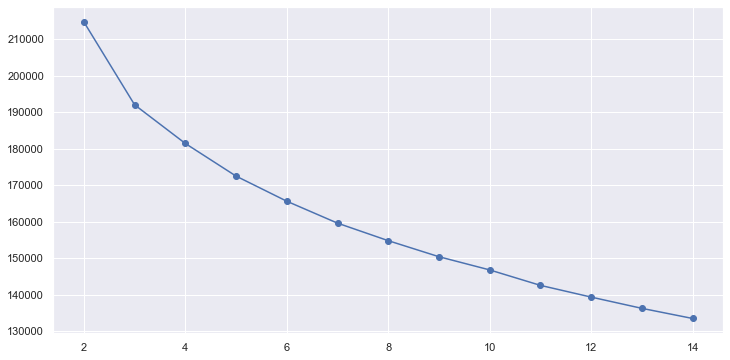

In [35]:
#b. Build a Kmeans clustering model using the obtained optimal K value from the elbow plot.
plt.figure(figsize=[12,6])
plt.plot(clusters_df['num_clusters'],clusters_df['cluster_errors'],marker='o',color='b')
plt.show()

In [36]:
## Fit the KMeans clustering model using the obtained optimal K=3 since there is max drop at n=3
kmeans = KMeans(n_clusters=3, n_init=15, random_state=2345)
kmeans.fit(df_scaled)

KMeans(n_clusters=3, n_init=15, random_state=2345)

In [37]:
### Creating a dataframe of the labels
df_labels = pd.DataFrame(kmeans.labels_, columns=list(['Labels']))

df_labels.head(5)

,Labels
0,2
1,2
2,2
3,2
4,1


In [38]:
df_labels['Labels'] = df_labels['Labels'].astype('category')

In [39]:
## joining the label dataframe with unscaled initial dataframe.(df)

df_kmeans = df.join(df_labels)

df_kmeans.head()

,level_0,index,Unnamed: 0,fit,bust size,weight,rating,rented for,body type,category,height,size,age,Labels
0,-1.732040,-1.730590,-1.730590,-0.558048,-0.909026,-0.006648,0.640314,0.558800,0.078459,1.639954,1.079475,0.260727,-0.778317,2
1,-1.732018,-1.730572,-1.730572,-0.558048,-0.818708,-0.253613,0.640314,-1.887287,1.784613,-0.723204,0.755995,0.015234,0.504739,2
2,-1.731996,-1.730536,-1.730536,-0.558048,-0.863867,-0.105434,-0.752176,-1.071925,0.647177,-0.492652,-1.184887,-0.475752,0.183975,2
3,-1.731974,-1.730518,-1.730518,-0.558048,-0.818708,0.388495,0.640314,0.966482,-1.058976,-0.723204,1.241215,0.015234,-0.938699,2
4,-1.731952,-1.730500,-1.730500,-0.558048,-0.231642,0.042745,-0.752176,-0.256562,-1.058976,-0.492652,1.079475,-0.475752,1.948176,1


In [40]:
df_kmeans['Labels'].value_counts()

2    7821
1    7717
0    4462
Name: Labels, dtype: int64

In [41]:
#c. Compute silhoutte score for evaluating the quality of the Kmeans clustering technique.

from sklearn.metrics import silhouette_score

kmeans_score = []

for i in range(2,15):
    kmeans = KMeans(n_clusters=i)
    kmeans = kmeans.fit(df_scaled)
    labels = kmeans.predict(df_scaled)
    print(i,silhouette_score(df_scaled,labels))
    
#from above we can say that silhoutte score is more for cluster 2 and 3.
#So, the clusters are labelled as 0,1,2

2 0.16315502180048116
3 0.15409634894359506
4 0.13241780559553717
5 0.13171648095431984
6 0.12296589347269325
7 0.10853186621852579
8 0.09582418804116423
9 0.0960304968405802
10 0.09494940683471861
11 0.09367361573370747
12 0.09288325406189535
13 0.09182292901380759
14 0.09968074858239685


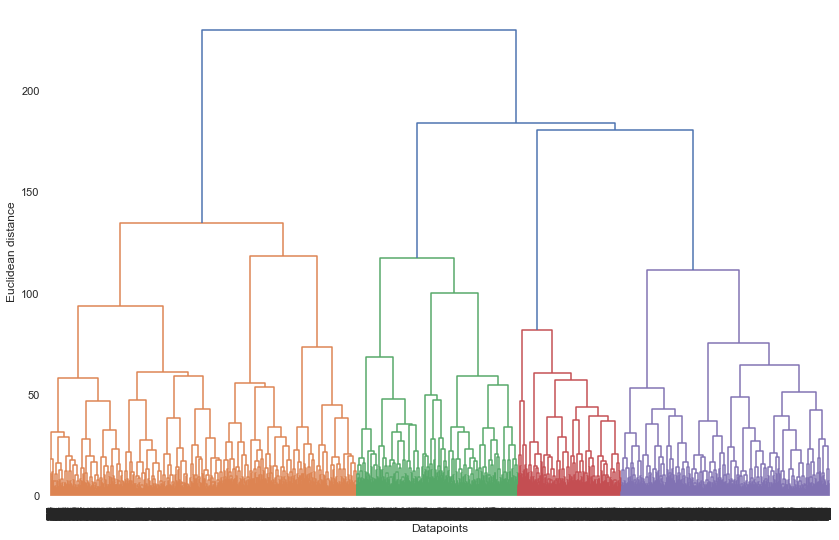

In [47]:
#Apply Agglomerative clustering and segment the data. (You may use original data or PCA transformed data) 
#a. Find the optimal K Value using dendrogram for Agglomerative clustering.
ss = StandardScaler()

df_scaled.iloc[:,:] = ss.fit_transform(df_scaled.iloc[:,:])

plt.figure(figsize=[14,9])
merg = linkage(df_scaled, method='ward')
dendrogram(merg, leaf_rotation=90,)
plt.xlabel('Datapoints')
plt.ylabel('Euclidean distance')
plt.show()

In [54]:
#b. Build a Agglomerative clustering model using the obtained optimal K value observed from dendrogram
hie_cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean',
                                     linkage='ward')

hie_cluster_model = hie_cluster.fit(df_scaled)

In [55]:
## Creating a dataframe of the labels
df_label1 = pd.DataFrame(hie_cluster_model.labels_,columns=['Labels'])
df_label1.head(n=10)

,Labels
0,0
1,0
2,2
3,0
4,1
5,0
6,2
7,1
8,1
9,2


In [56]:
## joining the label dataframe with unscaled initial dataframe.(df)
df_hier = df.join(df_label1)

In [57]:
#c. Compute silhoutte score for evaluating the quality of the Agglomerative clustering technique

from sklearn.metrics import silhouette_score
for i in range(2,15):
    hier = AgglomerativeClustering(n_clusters=i)
    hier = hier.fit(df_scaled)
    labels = hier.fit_predict(df_scaled)
    print(i,silhouette_score(df_scaled,labels))
    
#from above we can say that silhoutte score is more for cluster 2 and 3.
#Therefore there will be 3 classes using agglomerative clustering.

2 0.0931087267188438
3 0.10078832724805407
4 0.09118592258972265
5 0.06844585109370782
6 0.07259870300323373
7 0.07917029716980895
8 0.07442019283459297
9 0.08106244019781515
10 0.06692330594100325
11 0.07024340344905365
12 0.054067273965465575
13 0.05634952544899299
14 0.058229657129991765


# 5. Conclusion :

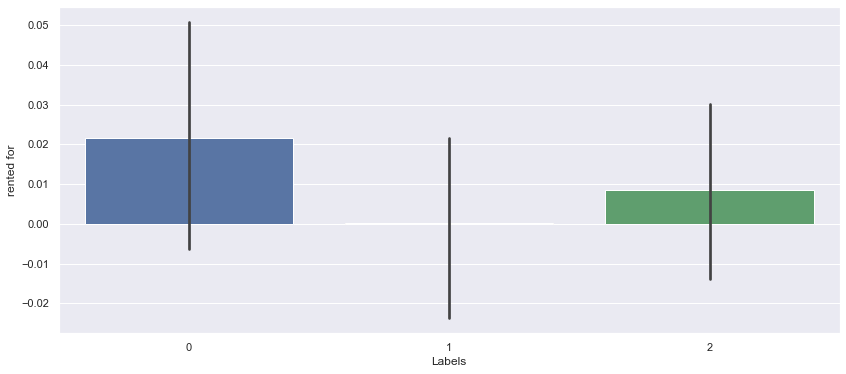

In [58]:
#17.Perform cluster analysis by doing bivariate analysis between cluster label and different features and
#write your conclusion on the results.
sns.barplot(df_kmeans['Labels'],df_kmeans['rented for'])
plt.show()
#the below bar plot shows what peple have rented cloth for different purposes

<AxesSubplot:xlabel='Labels', ylabel='category'>

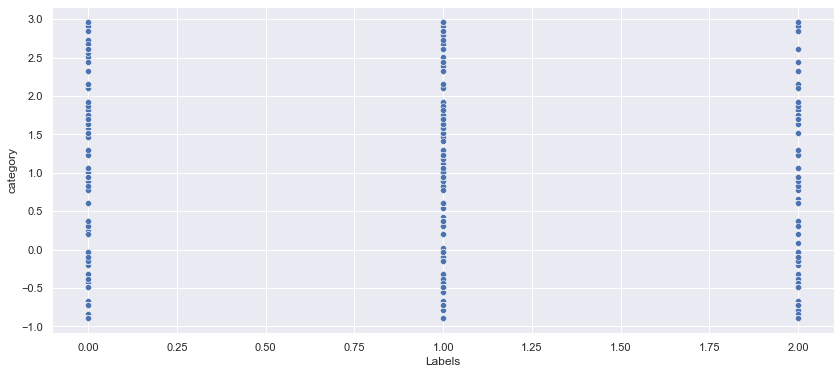

In [59]:
#This scatter plot shows differnt categories of products
sns.set(rc={"figure.figsize":(14, 6)})
sns.scatterplot(df_hier['Labels'],df_hier['category'])

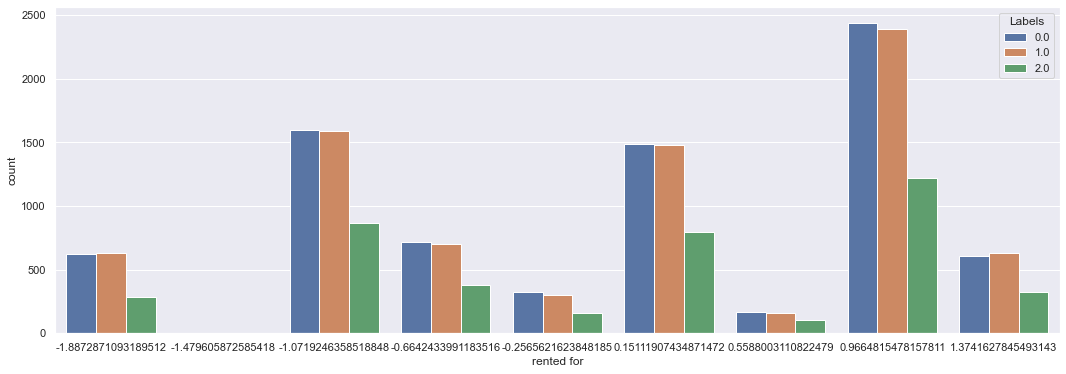

In [60]:
#the below bar plot shows what peple have rented cloths for different purposes
sns.set(rc={"figure.figsize":(18, 6)})
sns.countplot(data = df_hier, x = 'rented for', hue = 'Labels')
plt.show()

In [43]:
# We built Kmeans clustering and Agglomerative clustering models
#*KMeans* - for chosing the optimal k value we used elbow method (we chose K=3)
#*Agglomerative* - for chosing the optimal k value we used dendogram (we chose k=3)
# To conculde which clustering technique is performing the best, we evaluated through silhouette score
#For Kmeans the highest silhouette score value is 0.62 for 2 clusters
#For Agglomerative the highest silhouette score value is 0.097 for 2 clusters
#So, we can choose the KMeans clustering model as our best and final model and optimal number of clusters as 2
# Most of the people have rented clothes for party,formal atire and wedding,therefore the company has to focus more on 
#these factors to achieve growth in their business